In [2]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier 
from sklearn import preprocessing
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,  classification_report
from sklearn import tree

## 1.Let’s try determining the type of disease based on the patient’s Age. Use gradient descent (GD) to build your regression model (model1). Start by writing the GD algorithm and then implement it using a programming language of your choice.

In [615]:
mtpb1 = pd.read_csv('dermatology.csv', sep='\t')
mtpb1.head()


,Erythema,Scathing,Definite Borders,Itching,Koebner,Polygonal,Follicular,Oral,Knee,Scalp,...,Disapperance,Vacuolisation,Spongiosis,Retes,Follicular.1,Perifollicular,Inflamatory,Band-like,Age,Disease
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [616]:
mtpb1.describe()

,Erythema,Scathing,Definite Borders,Itching,Koebner,Polygonal,Follicular,Oral,Knee,Scalp,...,Focal,Disapperance,Vacuolisation,Spongiosis,Retes,Follicular.1,Perifollicular,Inflamatory,Band-like,Disease
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,...,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,...,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,...,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


In [617]:
mtpb1['Age'] = pd.to_numeric(mtpb1['Age'],errors='coerce')
mtpb1['Age'] = mtpb1['Age'].fillna(0.0).astype(int)

In [618]:
list_of_column_names2 = list(mtpb1.columns)
list_of_column_names2

['Erythema',
 'Scathing',
 'Definite Borders',
 'Itching',
 'Koebner ',
 'Polygonal',
 'Follicular',
 'Oral',
 'Knee',
 'Scalp',
 'Family Hostory',
 'Melanin',
 'Eosinophils',
 'PNL',
 'Fibrosis',
 'Exocytosis',
 'Acanothosis',
 'Hyperkeratosis',
 'Parakeratosis',
 'Clubbing',
 'Elongation',
 'Thinning',
 'Spongiform',
 'Munro',
 'Focal',
 'Disapperance',
 'Vacuolisation',
 'Spongiosis',
 'Retes',
 'Follicular.1',
 'Perifollicular',
 'Inflamatory',
 'Band-like',
 'Age',
 'Disease']

In [619]:
X=mtpb1[['Age']]
y=mtpb1[['Disease']]
 

array([[<AxesSubplot:title={'center':'Erythema'}>,
        <AxesSubplot:title={'center':'Scathing'}>,
        <AxesSubplot:title={'center':'Definite Borders'}>,
        <AxesSubplot:title={'center':'Itching'}>,
        <AxesSubplot:title={'center':'Koebner '}>,
        <AxesSubplot:title={'center':'Polygonal'}>],
       [<AxesSubplot:title={'center':'Follicular'}>,
        <AxesSubplot:title={'center':'Oral'}>,
        <AxesSubplot:title={'center':'Knee'}>,
        <AxesSubplot:title={'center':'Scalp'}>,
        <AxesSubplot:title={'center':'Family Hostory'}>,
        <AxesSubplot:title={'center':'Melanin'}>],
       [<AxesSubplot:title={'center':'Eosinophils'}>,
        <AxesSubplot:title={'center':'PNL'}>,
        <AxesSubplot:title={'center':'Fibrosis'}>,
        <AxesSubplot:title={'center':'Exocytosis'}>,
        <AxesSubplot:title={'center':'Acanothosis'}>,
        <AxesSubplot:title={'center':'Hyperkeratosis'}>],
       [<AxesSubplot:title={'center':'Parakeratosis'}>,
        <A

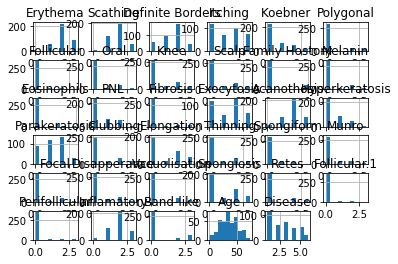

In [620]:

mtpb1.hist()

In [621]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.3, random_state=10)

In [622]:
regression_state = LinearRegression()
#regression_state.fit(X_train, Y_train)
# print(regression_state.fit(X_train, Y_train))
#regression_state.fit(X, y)

In [623]:
X

,Age
0,55
1,8
2,26
3,40
4,45
...,...
361,25
362,36
363,28
364,50


In [624]:
#regression_state.fit(X, Y)
# print(regression_state.fit(X_train, Y_train))
regression_state.fit(X, Y)

LinearRegression()

In [625]:
theta0 = regression_state.intercept_
theta1= regression_state.coef_
theta0, theta1

(array([2.02666256]), array([[0.00117296]]))

In [626]:
regression_state.score(X_test, Y_test)

-0.18331143358852842

In [627]:
regression_state.score(X_train, Y_train)

-0.23637655098758859

In [628]:
y_prediction = regression_state.predict(X_test)
y_predict = regression_state.predict([[55],[3]])
y_predict

A:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[2.09117562],
       [2.03018145]])

In [629]:
evaluate = pd.DataFrame({'Actual': Y_test.values.flatten(), 'Predicted': y_prediction.flatten()})

evaluate

,Actual,Predicted
0,1,2.108770
1,5,2.097040
2,3,2.081792
3,5,2.047776
4,6,2.036046
...,...,...
105,2,2.087657
106,3,2.074754
107,5,2.087657
108,1,2.097040


<AxesSubplot:ylabel='Frequency'>

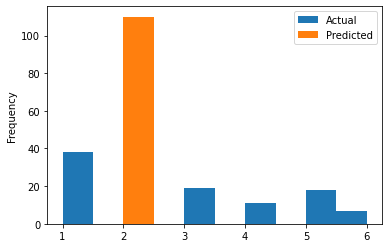

In [630]:
evaluate.plot(kind='hist')

In [631]:
from pandas.plotting import andrews_curves

<AxesSubplot:>

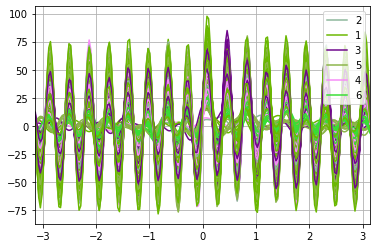

In [632]:
plt.figure()

andrews_curves(mtpb1, "Disease")

## Use random forest on the clinical as well as histopathological attributes to classify the disease type (model2).

In [633]:
mtpb2 = mtpb1
mtpb2 = mtpb2.reindex(['Erythema','Scathing','Definite Borders','Itching','Koebner', 'Polygonal','Follicular',	'Oral','Knee','Scalp','Family Hostory','Melanin	','Eosinophils','PNL','Fibrosis','Exocytosis','Acanothosis','Hyperkeratosis','Parakeratosis','Elongation', 'Thinning','Spongiform','Munro'	,'Focal','Disapperance', 'Vacuolisation	','Spongiosis',	'Retes','Follicular','Perifollicular',	'Inflamatory','Band-like','Age','Disease'], axis=1)


In [634]:
x = mtpb2[['Erythema','Scathing','Definite Borders','Itching', 'Polygonal','Follicular','Oral','Knee','Scalp','Family Hostory','Eosinophils','PNL','Fibrosis','Exocytosis','Acanothosis','Hyperkeratosis','Parakeratosis','Elongation', 'Thinning','Spongiform','Munro'	,'Focal','Disapperance','Spongiosis',	'Retes','Follicular','Perifollicular',	'Inflamatory','Band-like','Age']]
y = mtpb2[['Disease']]

In [635]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [636]:
pred = dtree.predict(X_test)
pred

array([1, 4, 1, 1, 4, 4, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 5, 3, 1, 1, 1, 6,
       4, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 6, 6, 3, 3, 2, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 4, 5, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 4, 1,
       1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 4, 1, 1, 2, 3, 1, 4, 1, 3,
       1, 1, 4, 1, 1, 3, 1, 1, 2, 4, 3, 5, 1, 3, 1, 1, 3, 6, 3, 1, 5, 1],
      dtype=int64)

## Use kNN on the clinical attributes and histopathological attributes to classify the disease type and report your accuracy (model3). 

In [637]:
k_neighbors= np.arange(1,11)
train_accuracy = np.empty(10)
test_accuracy = np.empty(10)

for i, k in enumerate(k_neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, Y_train)
    
    train_accuracy[i] = knn.score(X_train, Y_train)
    test_accuracy[i] = knn.score(X_test, Y_test)

A:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
A:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
A:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
A:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fi

## Finally, use two different clustering algorithms and see how well these attributes can determine the disease type (model4 and model5).

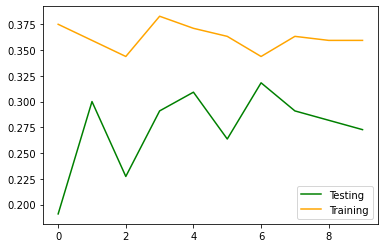

In [638]:
plt.plot(test_accuracy, color='green', label='Testing')
plt.plot(train_accuracy, color='orange', label='Training')
plt.legend()

In [639]:
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

In [640]:
accuracys= accuracy_score(y_test, pred)
accuracys

0.2636363636363636

In [641]:
rtree1 = RandomForestClassifier(n_estimators = 100)
rtree1.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

In [642]:
pred1 = rfc.predict(X_test)
accuracys= accuracy_score(y_test, pred1)
accuracys

0.4090909090909091

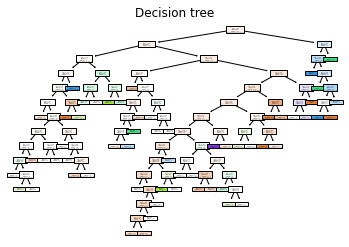

In [643]:
clf = DecisionTreeClassifier(criterion ="gini", random_state = 100, max_depth= 6, min_samples_leaf=4)
plt.figure()
clf = DecisionTreeClassifier().fit(X_train, Y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree")
plt.show()

In [644]:
mtpb2 = mtpb3
mtpb3 = mtpb3.reindex(['Erythema','Scathing','Definite Borders','Itching','Koebner', 'Polygonal','Follicular',	'Oral','Knee','Scalp','Family Hostory','Melanin	','Eosinophils','PNL','Fibrosis','Exocytosis','Acanothosis','Hyperkeratosis','Parakeratosis','Elongation', 'Thinning','Spongiform','Munro'	,'Focal','Disapperance', 'Vacuolisation	','Spongiosis',	'Retes','Follicular','Perifollicular',	'Inflamatory','Band-like','Age','Disease'], axis=1)


In [645]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [646]:
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(x_train,y_train)

A:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [647]:
k_neighbors= np.arange(1,11)
train_accuracy = np.empty(10)
test_accuracy = np.empty(10)

for i, k in enumerate(k_neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(x_train, y_train)
    
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)

A:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
A:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
A:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
A:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fi

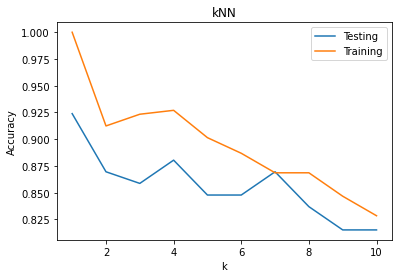

In [648]:
plt.title('kNN')
plt.plot(k_neighbors, test_accuracy, label = 'Testing')
plt.plot(k_neighbors, train_accuracy, label = 'Training')
plt.legend()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

In [649]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
import scipy.cluster.hierarchy as sch

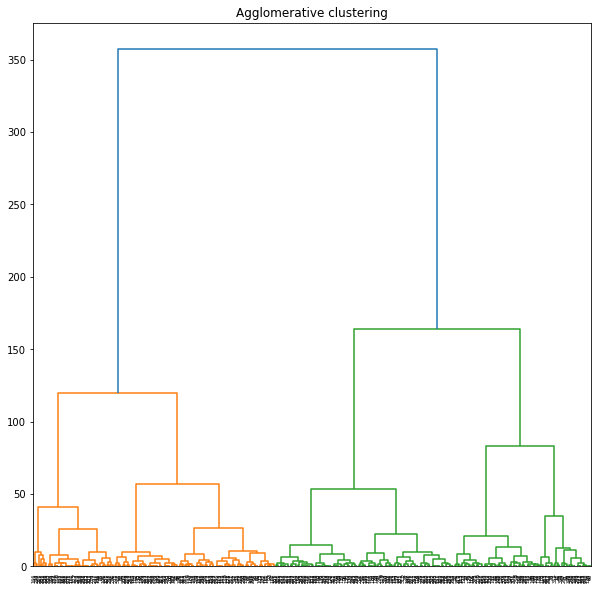

In [650]:
X = mtpb2[['Disease']+['Age']]
scaler = StandardScaler()
scaler.fit_transform(X)
kmeans = KMeans(n_clusters = 4)
y_means = kmeans.fit_predict(X)

centroids = kmeans.cluster_centers_

plt.figure(figsize = (10,10))
plt.title('Agglomerative clustering')
Dendrogram = sch.dendrogram((sch.linkage(X, method = 'ward')))

ac = AgglomerativeClustering(n_clusters = 4)
y_ac = ac.fit_predict(X)



A:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


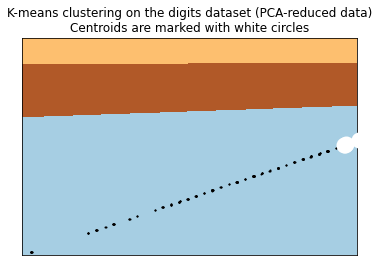

In [651]:
reduced_data = PCA().fit_transform(X)
x_min, x_max = reduced_data[:,0].min() - 1, reduced_data[:, 1].max() + 1
y_min, y_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 0], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 0],
    #marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white circles"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [652]:
from sklearn.linear_model import LinearRegression

In [657]:
from matplotlib.colors import ListedColormap

## How does income inequality relate to the number of hate crimes and hate incidents?

In [658]:
mtpbs2 = pd.read_csv('hatecrime.csv', sep=',')
mtpbs2.head()


,state,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
0,Alabama,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,0.125839,1.806410
1,Alaska,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,0.143740,1.656700
2,Arizona,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,0.225320,3.413928
3,Arkansas,44922,0.052,0.69,0.824,0.04,0.12,0.458,0.26,0.60,0.069061,0.869209
4,California,60487,0.059,0.97,0.806,0.13,0.09,0.471,0.61,0.33,0.255805,2.397986


In [659]:
mtpbs2['share_non_citizen'] = mtpbs2['share_non_citizen'].fillna(0)
mtpbs2['share_white_poverty'] = mtpbs2['share_white_poverty'].fillna(0)
mtpbs2['share_unemployed_seasonal'] = mtpbs2['share_unemployed_seasonal'].fillna(0)
mtpbs2['hate_crimes_per_100k_splc'] = mtpbs2['hate_crimes_per_100k_splc'].fillna(0)

In [660]:
X = mtpbs2[['share_white_poverty', 'share_non_citizen', 'share_unemployed_seasonal','share_non_citizen','share_population_with_high_school_degree']] 
y = mtpbs2[['hate_crimes_per_100k_splc']]  # population served , response variable

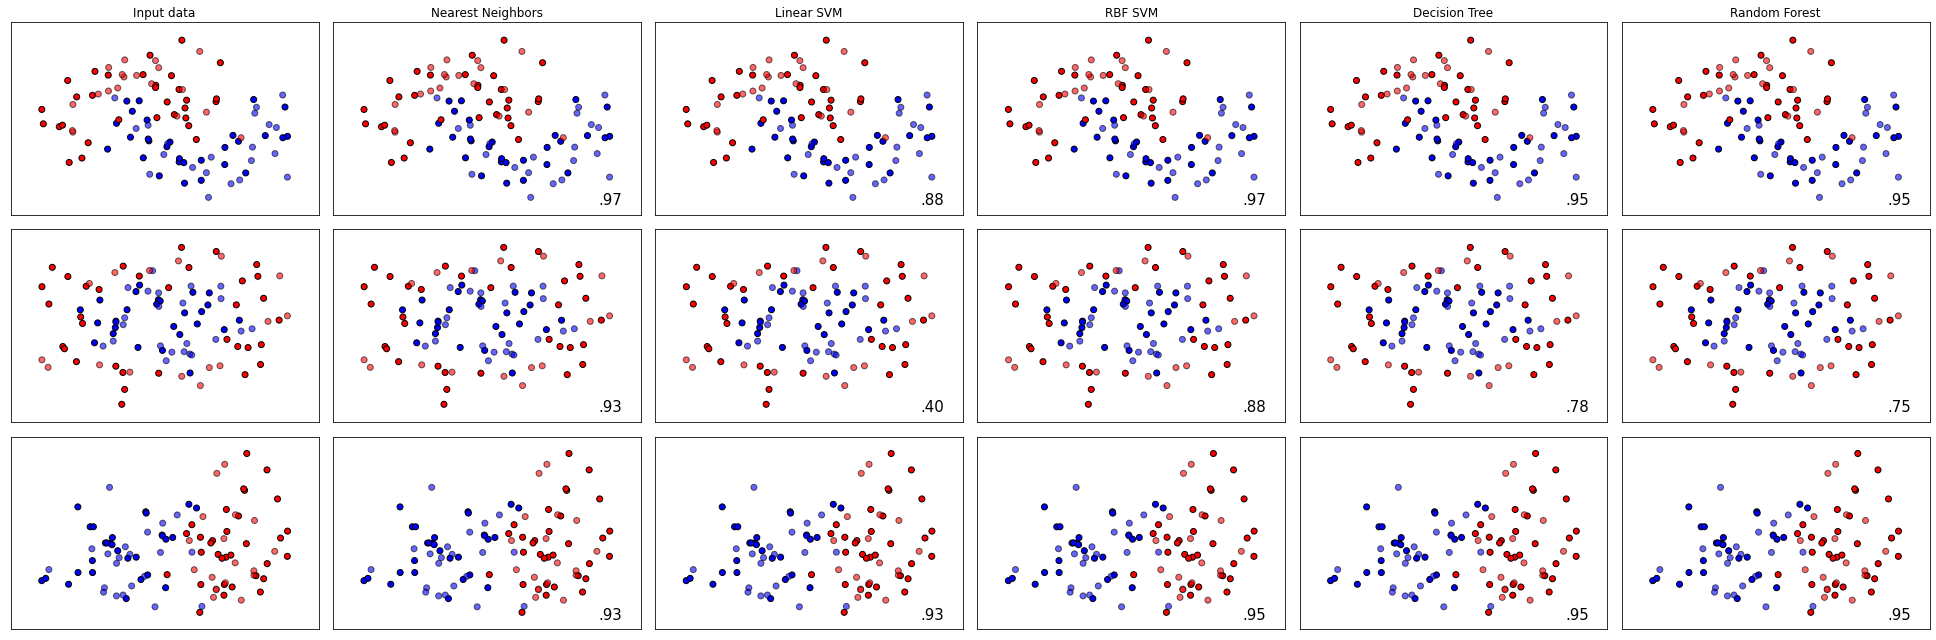

In [661]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
   # "Gaussian Process",
    "Decision Tree",
    "Random Forest",
   # "Neural Net",
   # "AdaBoost",
   # "Naive Bayes",
   # "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
   # GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
   # MLPClassifier(alpha=1, max_iter=1000),
   # AdaBoostClassifier(),
   # GaussianNB(),
    #QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        #DecisionBoundaryDisplay.from_estimator(
         #   clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        #)

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

## How can we predict the number of hate crimes and hate incidents from race/nature of the population?


In [662]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state=100) 

In [663]:
regression_state2 = LinearRegression()
regression_state2.fit(X, y)

LinearRegression()

In [664]:
theta0 = regression_state2.intercept_
theta1= regression_state2.coef_
theta0, theta1

(0.49999999999999994, array([-0.42722722,  0.02576272]))

<AxesSubplot:xlabel='state'>

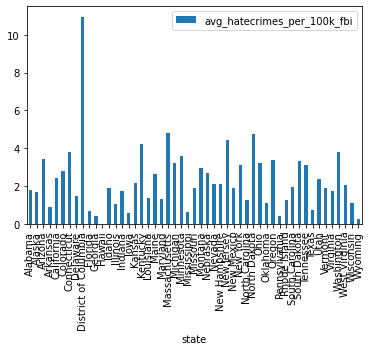

In [665]:
regression_state2_model = sm.OLS(y,X).fit() 


 
mtpbs2[["state", "avg_hatecrimes_per_100k_fbi"]].plot(x="state", kind="bar")


<AxesSubplot:xlabel='state'>

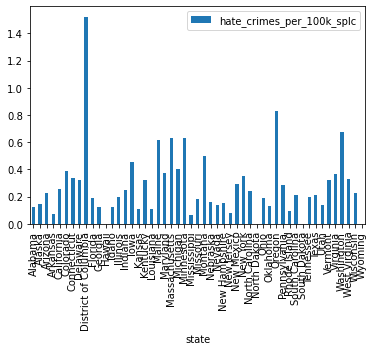

In [666]:

mtpbs2[["state", "hate_crimes_per_100k_splc"]].plot(x="state", y='hate_crimes_per_100k_splc', kind="bar")


## How does the number of hate crimes vary across states? Is there any similarity in number of hate incidents (per 100,000 people) between some states than in others — both according to the SPLC after the election and the FBI before it?

#### There are some similarities with some of the states and the propensity for hate crimes in their areas. According to the Southern Poverty Law Center and the FBI one can see that there are some areas that are 

In [667]:
print(regression_state2_model.summary()) 
print("Parameteers: ", regression_state2_model.params)
print("R2: ", regression_state2_model.rsquared)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.358
Model:                            OLS   Adj. R-squared (uncentered):              0.345
Method:                 Least Squares   F-statistic:                              27.38
Date:                Mon, 31 Oct 2022   Prob (F-statistic):                    3.59e-10
Time:                        01:37:44   Log-Likelihood:                         -85.044
No. Observations:                 100   AIC:                                      174.1
Df Residuals:                      98   BIC:                                      179.3
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [668]:
X = mtpbs2[['hate_crimes_per_100k_splc']]
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-0.60898129],
       [-0.53837743],
       [-0.21661946],
       [-0.83291927],
       [-0.09638236],
       [ 0.43495691],
       [ 0.21751533],
       [ 0.16766956],
       [ 4.89878947],
       [-0.36570095],
       [-0.63035295],
       [-1.10530096],
       [-0.61541312],
       [-0.33484507],
       [-0.13107646],
       [ 0.68700032],
       [-0.69057047],
       [ 0.17414891],
       [-0.67250309],
       [ 1.32257654],
       [ 0.35574256],
       [ 1.38267089],
       [ 0.48724002],
       [ 1.36953447],
       [-0.83928491],
       [-0.37752419],
       [ 0.84895878],
       [-0.47625998],
       [-0.54652969],
       [-0.50757618],
       [-0.79645565],
       [ 0.05746054],
       [ 0.27757658],
       [-0.14291775],
       [-1.10530096],
       [-0.3531085 ],
       [-0.57825617],
       [ 2.17953035],
       [ 0.01916255],
       [-0.72902859],
       [-0.2774591 ],
       [-1.10530096],
       [-0.3167262 ],
       [-0.26290733],
       [-0.56674877],
       [ 0

In [669]:
kmeans = KMeans(n_clusters = 4)
y_means = kmeans.fit_predict(X)

In [670]:
centroids = kmeans.cluster_centers_

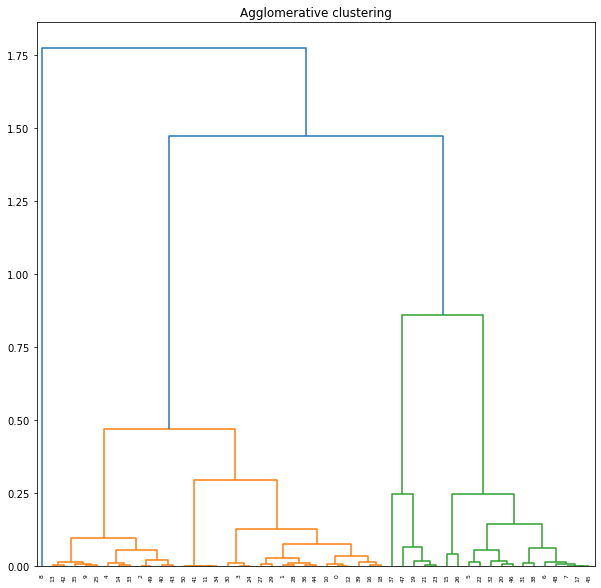

In [671]:
plt.figure(figsize = (10,10))
plt.title('Agglomerative clustering')
Dendrogram = sch.dendrogram((sch.linkage(X, method = 'ward')))

In [3]:
reduced_data = PCA().fit_transform(X)
x_min, x_max = reduced_data[:,0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 0], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 0],
    #marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white circles"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

NameError: name 'PCA' is not defined

In [673]:
ac = AgglomerativeClustering(n_clusters = 4)
y_ac = ac.fit_predict(X)
y_ac

array([0, 0, 0, 0, 0, 2, 2, 2, 3, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, 2, 1,
       2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 1, 2, 0, 0], dtype=int64)